In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('bookings.csv', sep=';')
df.head()

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.00,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.00,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.00,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.00,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.00,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


In [54]:
def rename_titles(name):
    new_name = name.replace(' ', '_').lower()
    return new_name

df = df.rename(columns=rename_titles)

df.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.00,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.00,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.00,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.00,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.00,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119390 non-null  object 
 1   is_canceled                119390 non-null  int64  
 2   lead_time                  119390 non-null  int64  
 3   arrival_full_date          119390 non-null  object 
 4   arrival_date_year          119390 non-null  int64  
 5   arrival_date_month         119390 non-null  object 
 6   arrival_date_week_number   119390 non-null  int64  
 7   arrival_date_day_of_month  119390 non-null  int64  
 8   stays_in_weekend_nights    119390 non-null  int64  
 9   stays_in_week_nights       119390 non-null  int64  
 10  stays_total_nights         119390 non-null  int64  
 11  adults                     119390 non-null  int64  
 12  children                   119386 non-null  float64
 13  babies                     11

In [56]:
df[df.is_canceled == 0].country.value_counts()

country
PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: count, Length: 165, dtype: int64

In [57]:
stays_total_nights_mean = df.groupby('hotel').agg({'stays_total_nights': 'mean'})
stays_total_nights_mean

,stays_total_nights
hotel,
City Hotel,2.98
Resort Hotel,4.32


In [58]:
df.query('assigned_room_type != reserved_room_type').shape

(14917, 21)

In [59]:
df.arrival_date_year.value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

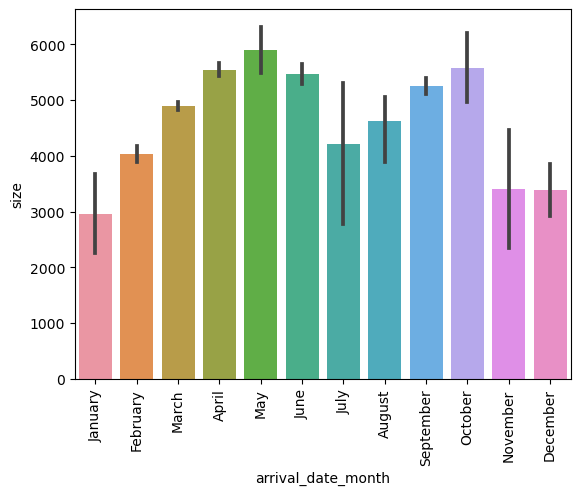

In [76]:
arrival_date_df = df.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False).size()

order1 = ['January','February','March', 'April', 'May','June', 'July','August', 'September', 'October', 'November','December']
sns.barplot(x='arrival_date_month',
            y='size',
            order=order1,
            data=arrival_date_df)
plt.xticks(rotation=90)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


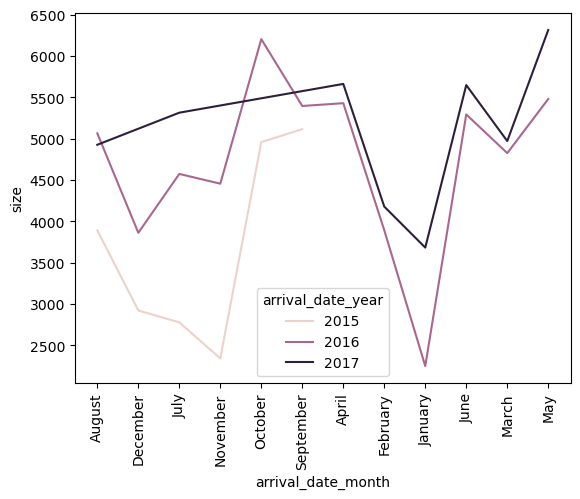

In [78]:
arrival_date_df = df.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False).size()

sns.lineplot(x='arrival_date_month',
            y='size',
            hue='arrival_date_year',
            data=arrival_date_df)
plt.xticks(rotation=90)
plt.show()

In [87]:
canceled = df.query("is_canceled == 1 and hotel == 'City Hotel'")
canceled = canceled.groupby('arrival_date_year')['arrival_date_month'].value_counts()
canceled

arrival_date_year  arrival_date_month
2015               September             1543
                   October               1321
                   August                1232
                   July                   939
                   December               668
                   November               301
2016               October               1947
                   June                  1720
                   September             1567
                   April                 1539
                   May                   1436
                   November              1360
                   August                1247
                   March                 1108
                   December              1072
                   July                  1043
                   February               930
                   January                438
2017               May                   2217
                   April                 1926
                   June                  1

In [92]:
df[['adults', 'children', 'babies']].mean().idxmax()

'adults'

In [95]:
df['total_kids'] = df.babies + df.children
df.groupby('hotel').agg({'total_kids': 'mean'})

,total_kids
hotel,
City Hotel,0.10
Resort Hotel,0.14


In [104]:
df['has_kids'] = df.total_kids > 0
no_kids_chirn = df.query('is_canceled == 1 and has_kids == False').shape[0] / df.query('has_kids == False').shape[0]
no_kids_chirn = round(no_kids_chirn* 100, 2)
no_kids_chirn

37.22

In [105]:
yes_kids_chirn = df.query('is_canceled == 1 and has_kids == True').shape[0] / df.query('has_kids == True').shape[0]
yes_kids_chirn = round(yes_kids_chirn* 100, 2)
yes_kids_chirn

34.92